In [12]:
import requests as r
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('kasseler.csv')
print(df.shape)
print(df[df.isna()['date']].shape)

(121573, 9)
(65271, 9)


In [28]:
df

,Unnamed: 0,author,title,place,date,location,year,lifted,source
0,0,*,A Campanha,NaN,NaN,PRT,1965.0,NaN,Livros Proibidos dos Anos da Ditadura de 1933 ...
1,1,* Mademoiselle la Comtesse de,Memoires de Mademoiselle la Comtesse de *,NaN,NaN,AUT,1776.0,NaN,Österreichische Listen verbotener Bücher von 1...
2,2,**,"Die Franzosen so wie sie sind, geschildert von...",NaN,NaN,AUT,1776.0,NaN,Österreichische Listen verbotener Bücher von 1...
3,3,**,Der Zwang zum Klosterleben. Ein Schauspiel in ...,NaN,NaN,AUT,1776.0,NaN,Österreichische Listen verbotener Bücher von 1...
4,4,**,"Angenehme Beschäftigungen in der Einsamkeit, o...",NaN,NaN,AUT,1794.0,NaN,Österreichische Listen verbotener Bücher von 1...
...,...,...,...,...,...,...,...,...,...
121568,121568,ATWOOD Margaret,The Handmaids Tale,Toronto,1985,CMR,NaN,NaN,individual research
121569,121569,PHILOMBE René,Choc anti-choc: roman en poèmes: écrits de pri...,Yaoundé,1978,CMR,NaN,NaN,"Breitinger, Eckhard (1993): 'Lamentations Patr..."
121570,121570,PHILOMBE René,"Bedi-ngula, l'ancien Maquisard",Bayreuth,2002,CMR,NaN,NaN,"Breitinger, Eckhard (1993): 'Lamentations Patr..."
121571,121571,PHILOMBE René,Les trouble-fêtes d'Africapolis,Yaoundé,1978,CMR,NaN,NaN,"Breitinger, Eckhard (1993): 'Lamentations Patr..."


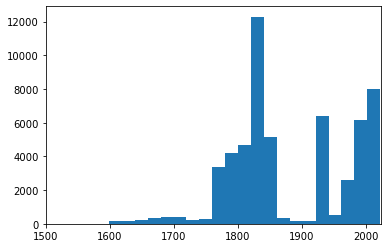

In [18]:
plt.hist(df['year'], bins=100)
plt.xlim((1500,2024))
plt.show()

In [25]:
df.loc[df['year']>2000, 'year'].value_counts()

2007.0    1203
2008.0    1202
2009.0    1172
2006.0     975
2005.0     895
2021.0     788
2002.0     538
2001.0     533
2010.0     498
2004.0     479
2003.0     431
2022.0     225
2013.0      58
2015.0      21
2014.0       9
2020.0       6
2023.0       5
2012.0       3
2017.0       3
2011.0       2
2016.0       2
Name: year, dtype: int64

In [ ]:
page_url = 'https://www.kasselerliste.com/die-kasseler-liste/'
table_url = 'https://www.kasselerliste.com/wp-admin/admin-ajax.php?action=get_wdtable&table_id=7'
n = 121_573

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36',
}
data = {
    'draw':30,
    'start':0,
    'length':n,
    'wdtNonce' : '05f7a668e5',
}

In [ ]:
res = r.post(table_url, data=data, headers=headers)
result = res.json()
data = result['data']
_ = [print(data[i]) for i in range(5)]

['*', 'A Campanha', None, None, 'PRT', '1965', None, 'Livros Proibidos dos Anos da Ditadura de 1933 a 1974, in:\xa0https://bibliblogue.files.wordpress.com/2012/04/200412livrosproibidos33_74.pdf']
['* Mademoiselle la Comtesse de', 'Memoires de Mademoiselle la Comtesse de *', None, None, 'AUT', '1776', None, 'Österreichische Listen verbotener Bücher von 1750–1848. Project manager: Norbert Bachleitner. 2010–. http://www.univie.ac.at/zensur/info.php']
['**', 'Die Franzosen so wie sie sind, geschildert von * *', None, None, 'AUT', '1776', None, 'Österreichische Listen verbotener Bücher von 1750–1848. Project manager: Norbert Bachleitner. 2010–. http://www.univie.ac.at/zensur/info.php']
['**', 'Der Zwang zum Klosterleben. Ein Schauspiel in VI. Abhandlungen', None, None, 'AUT', '1776', None, 'Österreichische Listen verbotener Bücher von 1750–1848. Project manager: Norbert Bachleitner. 2010–. http://www.univie.ac.at/zensur/info.php']
['**', 'Angenehme Beschäftigungen in der Einsamkeit, oder au

In [42]:
df = pd.DataFrame(data, columns=['author', 'title', 'place', 'date', 'location', 'year', 'lifted', 'source'])

In [43]:
print(df.head())
print(df.shape)

                          author  \
0                              *   
1  * Mademoiselle la Comtesse de   
2                             **   
3                             **   
4                             **   

                                               title place  date location  \
0                                         A Campanha  None  None      PRT   
1          Memoires de Mademoiselle la Comtesse de *  None  None      AUT   
2  Die Franzosen so wie sie sind, geschildert von...  None  None      AUT   
3  Der Zwang zum Klosterleben. Ein Schauspiel in ...  None  None      AUT   
4  Angenehme Beschäftigungen in der Einsamkeit, o...  None  None      AUT   

   year lifted                                             source  
0  1965   None  Livros Proibidos dos Anos da Ditadura de 1933 ...  
1  1776   None  Österreichische Listen verbotener Bücher von 1...  
2  1776   None  Österreichische Listen verbotener Bücher von 1...  
3  1776   None  Österreichische Listen verbotene

In [44]:
df.to_csv('kasseler.csv')

using this stack overflow as reference:
https://stackoverflow.com/questions/64813023/scraping-dynamic-datatable-of-many-pages-but-same-url

In [1]:
print("Hello")
print("THIS IS OLIVER")

Hello
THIS IS OLIVER
